## 딥러닝 한번에 끝내기
### 8. 가중치 초기화와 배치 정규화

### 8-1. 들어가며

![](./img08/01.png)

![](./img08/02.png)

#### 과정 개요

가중치 초기화(Weights Initialization)
어떤 목적으로 가중치 초기화를 진행하는지 이해하고 각 방법별 효과에 대해서 실습을 통해 확인합니다.

Reuters 딥러닝 모델 예제 로이터 기사 데이터를 분류하는 모델을 베이스라인으로 삼아서 오늘 배운 내용을 적용해봅니다.

배치 정규화(Batch Normalization) 배치 정규화는 어떤 것이고 어떤 효과가 있는지 실습을 통해 알아봅니다.

#### 학습 목표

딥러닝 모델의 효과적인 학습을 위한 가중치 초기화에 대해 학습합니다.

Reuters 데이터셋을 이용해 다중 분류를 위한 딥러닝 모델에 대해 학습합니다.

딥러닝 모델의 빠른 학습과 과대적합을 해결하는 배치 정규화 기술에 대해 학습합니다.

### 8-2. 가중치 초기화(Weights Initialization)

![](./img08/03.png)

![](./img08/04.png)

가중치가 0인 방법은 가중치가 0이기 때문에 모든 뉴런이 같은 값을 가지게 되어서 뉴런을 여러개 둔 의미가 없어집니다.

최악의 방법

![](./img08/05.png)

여전히 한곳으로 치우쳐 신경망 표현을 제한

![](./img08/06.png)

![](./img08/07.png)

![](./img08/08.png)

![](./img08/09.png)

![](./img08/10.png)

Relu 사용시 대부분 값이 0으로 나옴

![](./img08/11.png)

![](./img08/12.png)

![](./img08/13.png)

![](./img08/14.png)

![](./img08/15.png)

![](./img08/16.png)

가중치 초기화는 신경망의 성능에 큰 영향을 주는 요소 중 하나입니다. 만약 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값들도 치우치게 되고, 결국 표현할 수 있는 신경망의 수가 적어지는 문제가 발생합니다. 보통 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생할 수 있습니다. 즉, 모델의 활성화 값이 골고루 분포 되는 것이 중요합니다.

가중치 초기화 방법에 따라서 어떻게 달라지는지 살펴보기 위해 지정된 활성화 함수 activation과 초기화 initializer에 따라 모델을 생성하는 build_model 함수를 정의합니다.

In [12]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5',
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

각 레이어마다 분포값을 히스토그램으로 출력하기 위한 show_layer 함수를 정의합니다.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

/var/folders/vt/cvvn63n12qv1p9cwprw78jwc0000gq/T/ipykernel_50650/1486633323.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


여러 활성화 함수들이 있지만, 크게 선형 함수와 비선형 함수로 구분하여 가중치 초기화 방법에 따라 어떻게 분포가 달라지는지 살펴보도록 하겠습니다.

추가 안내: 영상에서의 히스토그램 범위는 (0, 1)이고, LMS에서의 히스토그램 범위는 (-1, 1)입니다. 따라서 영상의 결과/설명이 LMS 내의 결과/설명과 다를 수 있습니다. 히스토그램 범위를 변경한 이유는 비선형 함수인 reLU도 (0, 1)에서 선형이기 때문입니다.

#### 선형 함수 가중치 초기화

활성화 함수 중에서 activations.sigmoid를 사용하여 초기화 방법들을 비교해봅니다. sigmoid 함수는 전체적으로는 볼 때 비선형 함수이지만 특정 범위(-1, 1)에서는 선형 함수입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/SiGeuMoIDeuHamSu.png)

[시그모이드 함수]
https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98#/media/%ED%8C%8C%EC%9D%BC:Logistic-curve.svg

🪄 참고: 각 초기화 코드가 실행되려면 1-2분의 시간이 소요됩니다.

#### 제로 초기화

initializers.Zeros()를 이용해 가중치를 제로값으로 초기화해 봅시다.

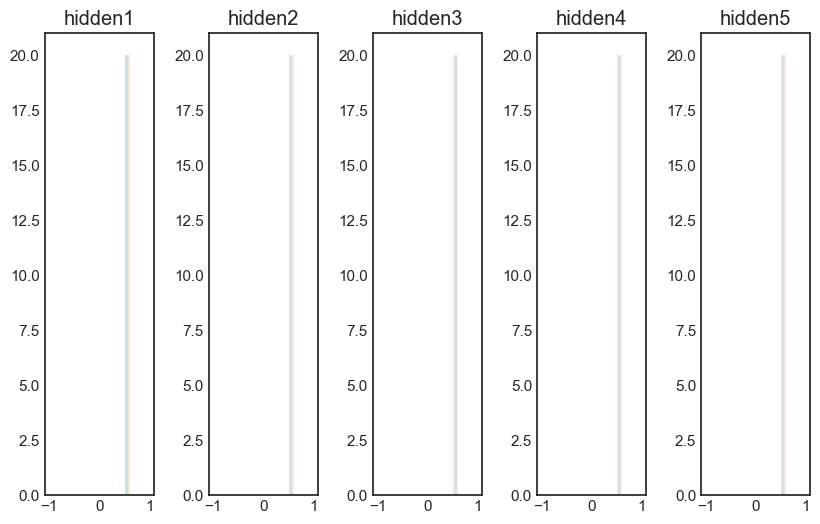

In [15]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

가중치를 제로값으로 초기화할 경우 각 레이어의 가중치 값 분포가 특정한 값으로만 몰려 있는 것을 알 수 있습니다. 가중치 값이 0일 경우에는 오차역전파에서 모든 가중치 값이 똑같이 갱신되어 학습이 올바르게 진행될 수 없습니다.

참고: 각 레이어의 값이 0.5에 몰려 있는 이유는 가중치 값이 활성화 함수로 사용한 sigmoid 함수를 통과하였기 때문입니다. (sigmoid(0)=0.5)

#### 정규분포 초기화

initializers.RandomNormal()를 통해 정규분포를 따르도록 무작위 값을 초기화해 봅시다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


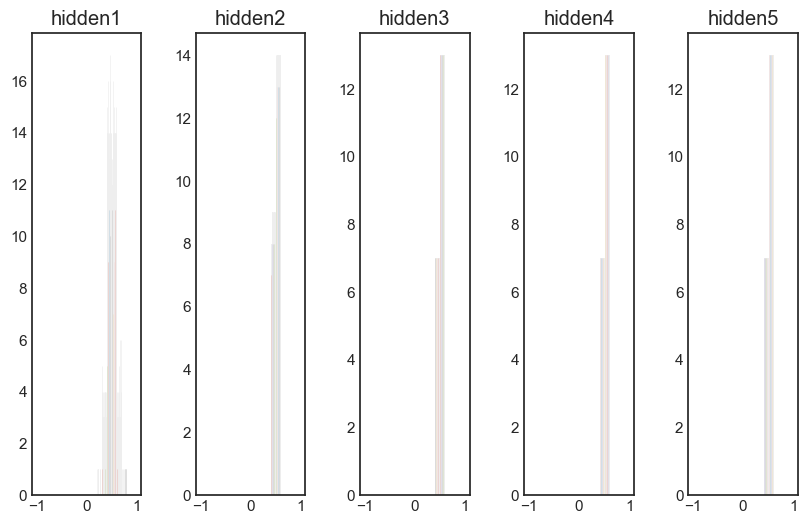

In [16]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

정규분포를 따르도록 무작위 값을 초기화하면 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있습니다. 그러나 한 곳에 치우쳐 있기 때문에 여전히 신경망의 표현을 제한한다는 문제가 있습니다.

#### 균일분포 초기화

initializers.RandomUniform()를 통해 균일분포를 따르는 무작위 값으로 초기화헤 봅시다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


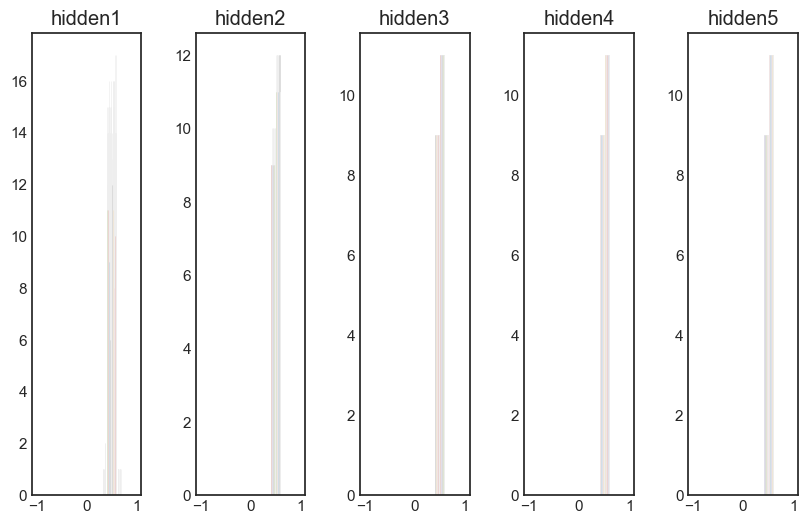

In [17]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

균일분포를 따르는 무작위 값으로 초기화한 결과도 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있습니다. 그러나 활성화 값이 균일하지 않으므로 역전파로 전해지는 기울기 값이 사라질 수 있습니다.

#### Xavier(Glorot) 정규분포 초기화

Xavier(Glorot) 방법은 은닉층의 노드의 수가 n이라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포로 초기화 를 수행합니다. initializers.GlorotNormal()를 적용한 모델을 시각화해 봅시다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


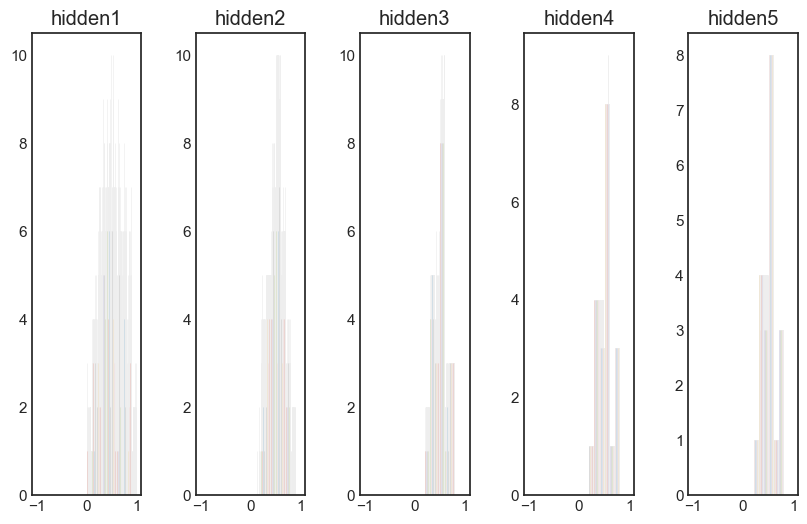

In [18]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

initializers.GlorotNormal()를 적용한 모델을 시각화한 결과를 보면 비교적 분포로 고르고 레이어마다 표현이 잘 되고 있는 것을 알 수 있습니다. 즉, 더 많은 가중치에 역전파가 전달이 가능하게 됩니다. 일반적으로 Xavier(Glorot) 방법은 활성화 함수가 선형함수인 경우에 매우 적합 합니다.

#### Xavier(Glorot) 균일분포 초기화

initializers.GlorotUniform()를 통해 Xavier(Glorot) 균일분포 초기화를 이용한 결과도 마찬가지로 잘 분포되어 있습니다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


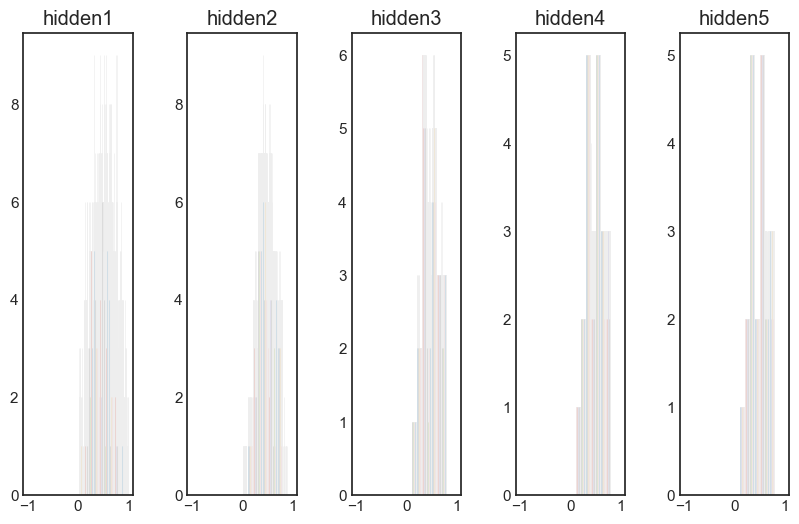

In [19]:
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

활성화 함수를 sigmoid 대신 tanh를 적용한 결과, 좀 더 균일한 분포의 모습을 보이는 것을 알 수 있습니다.

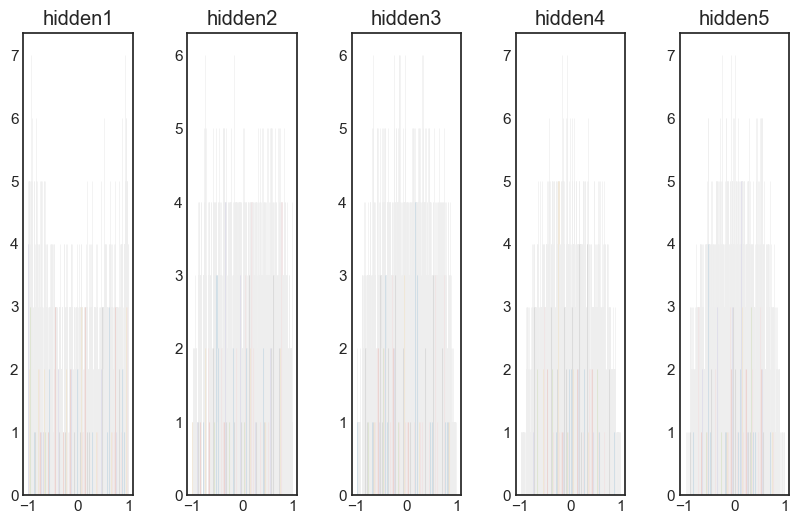

In [20]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

#### He 정규분포 초기화
He 초기화 방법은 표준편차가 $\sqrt{\frac{2}{n}}$인 분포를 가지도록 초기화합니다. 시각화한 결과를 살펴보면, 활성화값 분포가 균일하게 분포되어 있습니다. 참고로 ReLU와 같은 비선형함수 일 때 더 적합하다고 알려진 초기화 방법입니다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


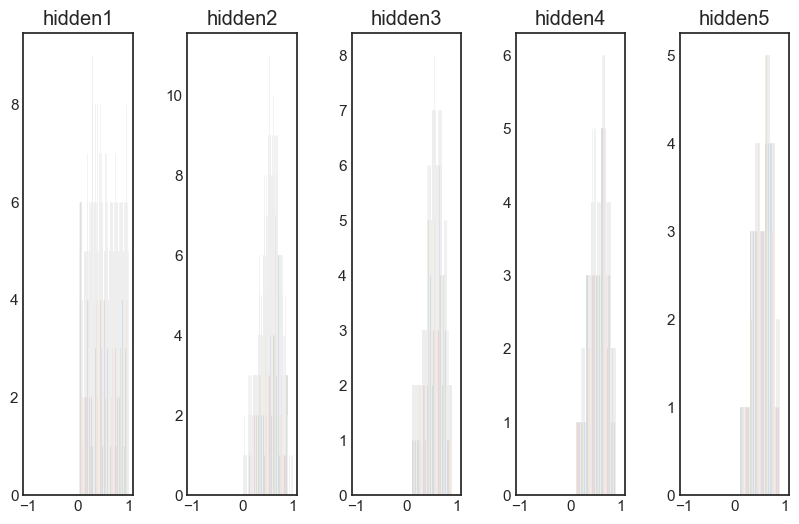

In [21]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

#### He 균일분포 초기화

He 균일분포도 정규분포와 유사하게 가중치 값들이 잘 분포되어 있음을 알 수 있습니다.

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


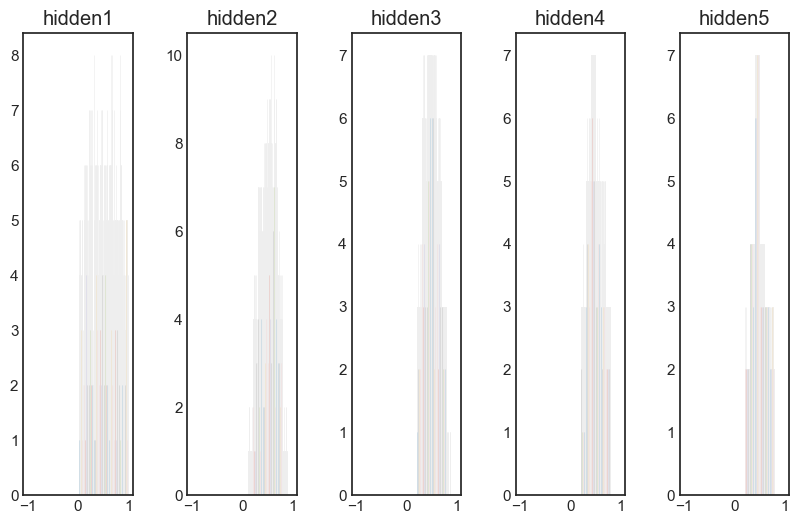

In [22]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

### 비선형 함수 가중치 초기화

대표적인 비선형 활성화 함수인 activations.relu를 사용하여 초기화 방법들을 비교해봅시다.

##### 제로 초기화

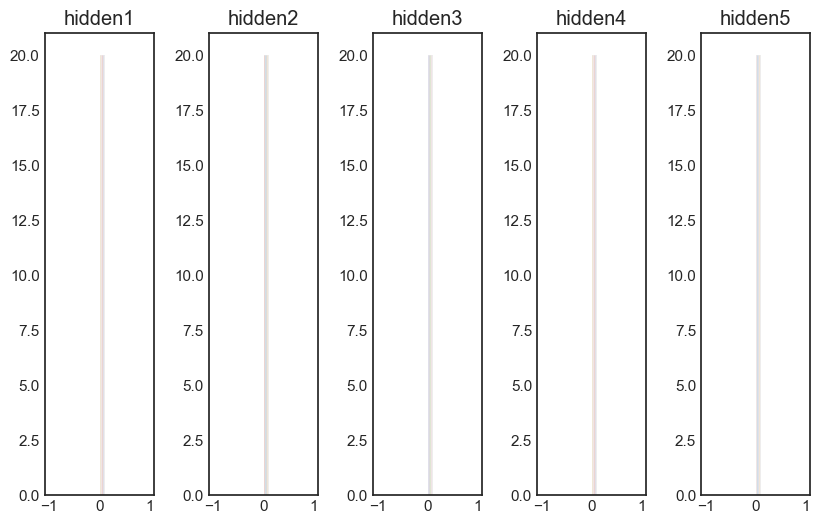

In [23]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

가중치를 제로값으로 초기화한 경우, 시각화 결과를 보면 레이어의 가중치 분포가 0에만 몰려 있는 것을 알 수 있습니다. 활성화 함수로 relu를 사용하였기 때문에 0인 값은 그대로 0에만 머무는 것을 알 수 있습니다.

##### 정규분포 초기화

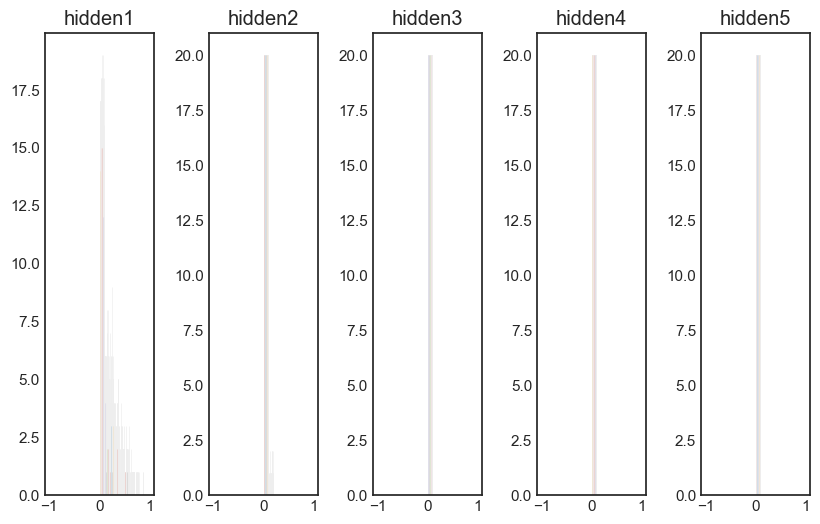

In [24]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

제로 초기화보다는 정규분포 초기화의 경우 분포가 퍼져있는 것을 알 수 있습니다. 그러나 마찬가지로 hidden1 레이어를 제외하고는 0에 치우쳐 있는 문제가 있습니다.

##### 균일분포 초기화

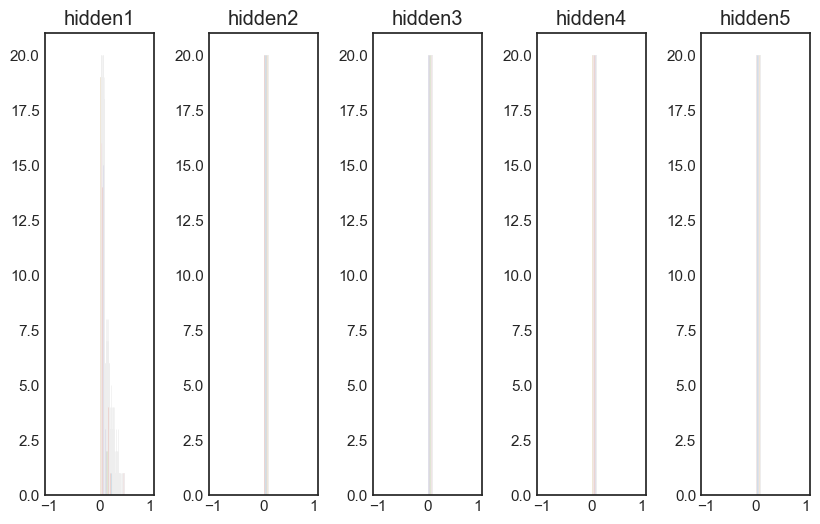

In [25]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

균일분포도 마찬가지로 처음 레이어를 제외하고는 가중치 값이 0에 치우쳐 있는 것을 알 수 있습니다.

##### Xavier(Glorot) 정규분포 초기화

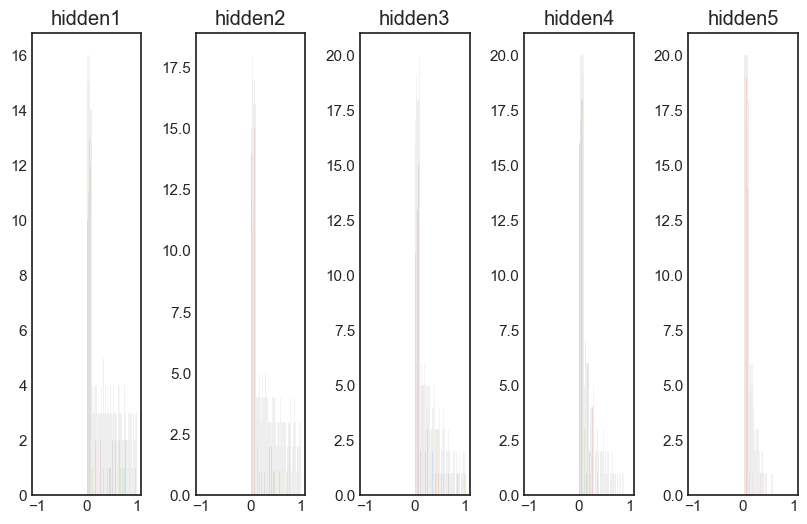

In [26]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

Xavier 초기화 방법은 relu 특성상 0인 값이 많지만, 전체 레이어를 보더라도 어느정도 분포가 퍼져있는 것을 알 수 있습니다.

##### Xavier(Glorot) 균일분포 초기화

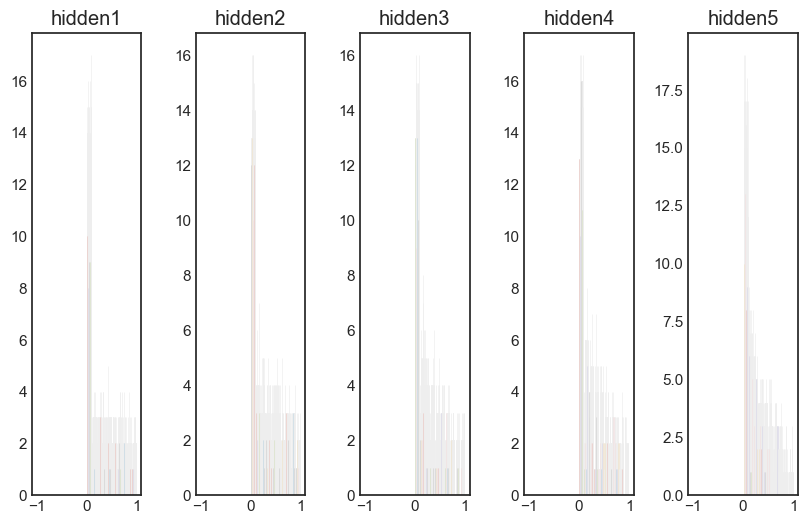

In [27]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

균일분포도 정규분포와 유사한 형태의 분포를 보여주고 있습니다.

##### He 정규분포 초기화

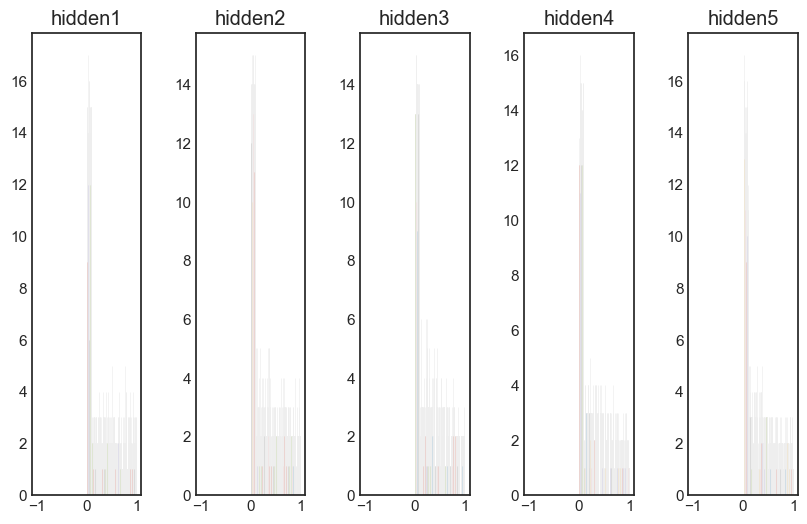

In [28]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

He 초기화는 일반적으로 비선형 함수에 더 적합하다고 알려져있으며, 시각화된 결과도 어느정도 분포가 고르게 형성되어 있음을 알 수 있습니다.

##### He 균일분포 초기화

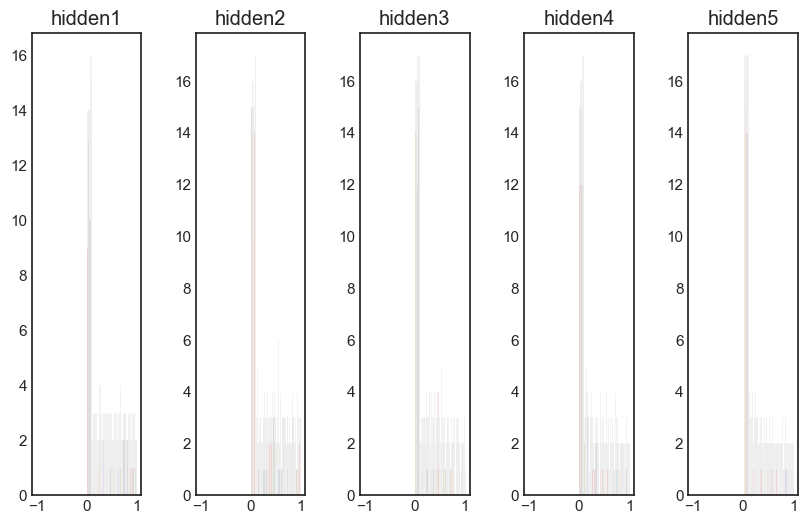

In [29]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

균일분포도 마찬가지로 정규분포와 유사한 모습을 보여주고 있습니다.

##### 실습해보기

가중치 초기화에 대해선 잘 이해하셨나요?

그럼 코드를 통해 익숙해지는 시간을 가져볼까요?

아래 링크를 참조하여 다른 활성화 함수와 각종 초기화 방법을 적용했을 때는 어떤 결과가 나올지 아래 코드를 이용해 확인해보세요.

https://keras.io/ko/initializers/

https://keras.io/ko/activations/

### 8-3. Reuters 딥러닝 모델 예제

Reuters 데이터셋은 뉴스 기사를 모아놓은 것으로 주제 분류를 위해 자주 사용하는 데이터입니다. 데이터셋은 뉴스 기사 텍스트와 46개의 토픽으로 구성되어 있습니다. Reuters 데이터셋으로 가중치 초기화 실습을 해 봅시다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/on-dlf-8-3-1.max-800x600.png)

#### 데이터 로드 및 전처리

케라스에서는 Reuters 뉴스 기사 데이터를 reuters.load_data() 함수를 통해 다운로드가 가능합니다. 본 예제에서는 num_words를 10000개로 제한하여 데이터를 로드합니다. 기본적으로 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분되어 있습니다. 레이블을 통해 뉴스 기사의 주제로 46개가 있는 것을 알 수 있습니다.

In [2]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


Reuters 데이터셋도 단어 인덱스로만 구성되어 있기 때문에 reuters.get_word_index() 함수를 통해 얻은 단어 인덱스 딕셔너리를 이용해 인덱스를 단어들로 변환이 가능합니다.
아래 코드블럭의 주석을 풀면 word_index 딕셔너리를 확인하실 수 있습니다.
(스크롤의 압박이 느껴질 수 있어요.😅)

In [3]:
word_index = reuters.get_word_index()
# word_index

인덱스 단어 딕셔너리 형태로 만들기 위해서 단어 인덱스 딕셔너리를 역으로 변환시킵니다.
아래 코드블럭의 주석을 풀면 index_word 딕셔너리를 확인하실 수 있습니다.
(스크롤의 압박이 느껴질 수 있어요.😅)

In [4]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.

In [5]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

단어 인덱스에서 0은 패딩을 의미하는 토큰인 pad, 1은 문장의 시작을 의미하는 토큰인 sos, 2는 OOV(Out Of Vocabulary)를 의미하는 토큰인 unk으로 지정되어 있습니다. 그러므로 i-3으로 인덱스를 맞춰주고, 해당 토큰들은 ?로 대체합니다.

In [6]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

딥러닝 모델의 학습에 사용하기 위해서는 텍스트 데이터를 벡터로 변환해야 합니다. 일반적으로 자주 사용되는 원-핫 인코딩(one-hot encoding)을 이용해 텍스트를 0과 1의 벡터로 변환합니다.

In [7]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


Reuters 데이터셋에서 레이블은 46개의 주제를 구분하기 위한 인덱스로 되어 있습니다. 몇 개의 레이블을 확인해 봅시다.

In [8]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환을 수행해 주어야 합니다. 케라스에서는 utils.to_categorical()을 이용해 쉽게 변환할 수 있습니다.

In [9]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### 모델 구성

Reuters 데이터셋을 주제별로 분류하기 위한 딥러닝 모델을 정의합니다. 순차적으로 레이어를 추가하여 단순한 모델을 생성하기 위해 Sequential() 함수를 사용합니다.

첫번째는 유닛수 256개, 활성화 함수는 'relu', 입력 차원은 10000, 이름은 input인 Dense 레이어를 추가합니다. 두번째도 마찬가지로 유닛수 256개를 가지고, relu 활성화 함수를 사용하며 이름은 hidden인 Dense 레이어를 추가합니다. 세번째는 뉴스 주제 갯수로 유닛수를 46개로 지정하고, 다중 분류이므로 활성화 함수는 softmax를 사용하고, 이름은 output으로 지정한 Dense 레이어를 추가합니다.

In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

#### 모델 컴파일 및 학습


정의한 모델에 사용할 옵티마이저는 rmsprop를 사용하고, 손실 함수는 다중 분류이므로 categorical_crossentropy를 지정합니다. 그리고 지표는 accuracy를 사용하고, 모델의 구조를 summary() 함수를 통해 살펴봅니다.

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1302574 (4.97 MB)
Trainable params: 1302574 (4.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


생성한 딥러닝 모델을 이용해 Reuters 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 40으로 지정합니다. 배치 사이즈는 512로 지정하고, 검증을 위해서 테스트 데이터인 x_test와 y_test를 지정하여 fit() 함수를 실행시킵니다.

In [12]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 2s 54ms/step - loss: 2.3035 - accuracy: 0.5588 - val_loss: 1.5280 - val_accuracy: 0.6692
Epoch 2/40
18/18 [==============================] - 0s 23ms/step - loss: 1.2522 - accuracy: 0.7252 - val_loss: 1.2312 - val_accuracy: 0.7226
Epoch 3/40
18/18 [==============================] - 1s 28ms/step - loss: 0.9289 - accuracy: 0.7969 - val_loss: 1.0594 - val_accuracy: 0.7640
Epoch 4/40
18/18 [==============================] - 0s 24ms/step - loss: 0.7073 - accuracy: 0.8468 - val_loss: 0.9777 - val_accuracy: 0.7850
Epoch 5/40
18/18 [==============================] - 1s 29ms/step - loss: 0.5492 - accuracy: 0.8775 - val_loss: 0.9148 - val_accuracy: 0.8001
Epoch 6/40
18/18 [==============================] - 1s 29ms/step - loss: 0.4267 - accuracy: 0.9093 - val_loss: 0.9400 - val_accuracy: 0.7787
Epoch 7/40
18/18 [==============================] - 0s 28ms/step - loss: 0.3521 - accuracy: 0.9234 - val_loss: 0.9218 - val_accuracy: 0.7930
Epoch 8/40
18

모델이 잘 학습되었는지 확인하기 위해서 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

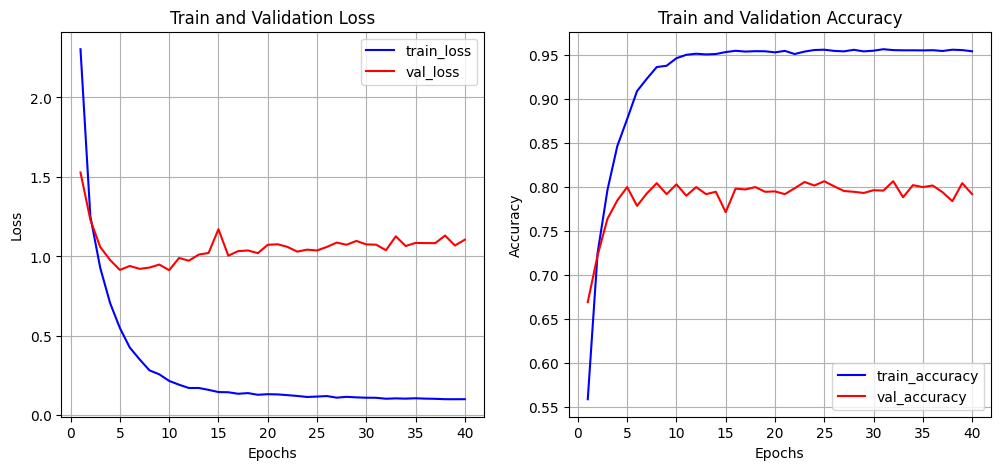

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 학습 결과를 살펴보면 에폭이 진행될수록 val_loss는 계속 증가하고, val_accuracy는 조금씩 감소하는 것을 알 수 있습니다. 모델은 과대적합된 상태인 것을 알 수 있습니다.

#### 가중치 초기화

이제 실제 Reuters 딥러닝 모델에 가중치 초기화를 적용한 결과를 살펴보기 위해 초기화 initializer에 따라 모델을 생성하는 build_model 함수를 정의합니다. 케라스에서는 기본적으로 레이어에 균일분포 초기화를 수행하지만, 다른 초기화 방법과 비교해보도록 하겠습니다.

In [14]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         input_shape=(10000, ),
                         name='input'))
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46,
                         activation='softmax',
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

모델의 학습 히스토리 결과를 비교해보기 위해서 시각화하는 diff_history 함수를 정의합니다.

In [15]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

##### 제로 초기화

가중치 값을 0으로 초기화하는 모델을 생성하여 학습합니다.

In [16]:
from tensorflow.keras import initializers
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 2s 55ms/step - loss: 3.8104 - accuracy: 0.0659 - val_loss: 3.7957 - val_accuracy: 0.0441
Epoch 2/40
18/18 [==============================] - 0s 28ms/step - loss: 3.7844 - accuracy: 0.1003 - val_loss: 3.7728 - val_accuracy: 0.3620
Epoch 3/40
18/18 [==============================] - 1s 33ms/step - loss: 3.7616 - accuracy: 0.3517 - val_loss: 3.7506 - val_accuracy: 0.3620
Epoch 4/40
18/18 [==============================] - 0s 27ms/step - loss: 3.7392 - accuracy: 0.3517 - val_loss: 3.7287 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 0s 27ms/step - loss: 3.7171 - accuracy: 0.3517 - val_loss: 3.7071 - val_accuracy: 0.3620
Epoch 6/40
18/18 [==============================] - 1s 30ms/step - loss: 3.6952 - accuracy: 0.3517 - val_loss: 3.6857 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 1s 36ms/step - loss: 3.6735 - accuracy: 0.3517 - val_loss: 3.6643 - val_accuracy: 0.3620
Epoch 8/40
18

기본 모델과 제로 초기화 모델 학습 결과를 비교해보면, 제로 초기화 모델은 학습이 제대로 되고 있지 않다는 것을 알 수 있습니다.

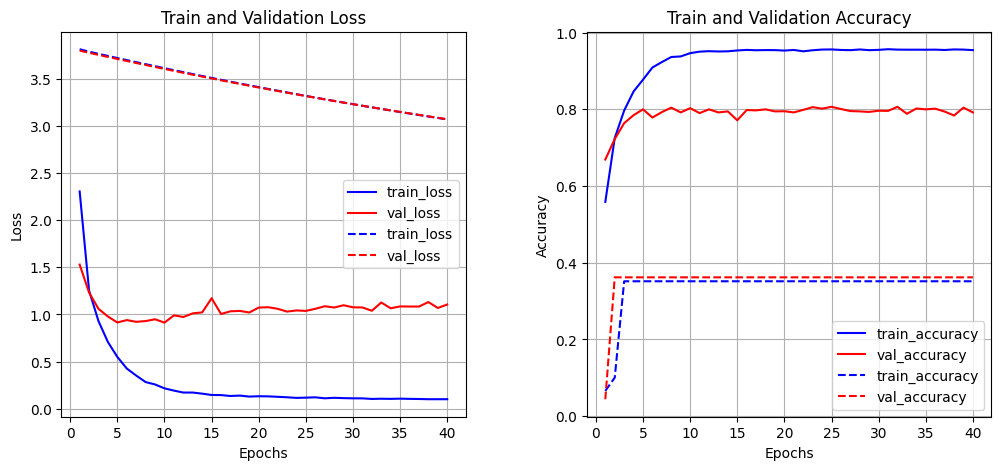

In [17]:
diff_history(history, zero_history)

##### 정규분포 초기화

정규분포 초기화 방법도 비교를 위해서 모델을 생성하여 학습합니다.

In [18]:
normal_history = build_model(initializers.RandomNormal())

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 2s 50ms/step - loss: 2.4025 - accuracy: 0.4747 - val_loss: 1.6822 - val_accuracy: 0.6153
Epoch 2/40
18/18 [==============================] - 1s 32ms/step - loss: 1.4618 - accuracy: 0.6654 - val_loss: 1.4071 - val_accuracy: 0.6861
Epoch 3/40
18/18 [==============================] - 1s 37ms/step - loss: 1.1660 - accuracy: 0.7340 - val_loss: 1.2492 - val_accuracy: 0.7226
Epoch 4/40
18/18 [==============================] - 1s 37ms/step - loss: 0.9650 - accuracy: 0.7820 - val_loss: 1.1708 - val_accuracy: 0.7297
Epoch 5/40
18/18 [==============================] - 0s 27ms/step - loss: 0.8049 - accuracy: 0.8164 - val_loss: 1.0721 - val_accuracy: 0.7498
Epoch 6/40
18/18 [==============================] - 1s 35ms/step - loss: 0.6716 - accuracy: 0.8459 - val_loss: 1.0911 - val_accuracy: 0.7418
Epoch 7/40
18/18 [==============================] - 1s 30ms/step - loss: 0.5610 - accuracy: 0.8742 - val_loss: 0.9890 - val_accuracy: 0.7752
Epoch 8/40
18

정규분포로 초기화한 결과는 기본 모델과 유사하지만 조금 더디게 학습된 것을 알 수 있습니다.

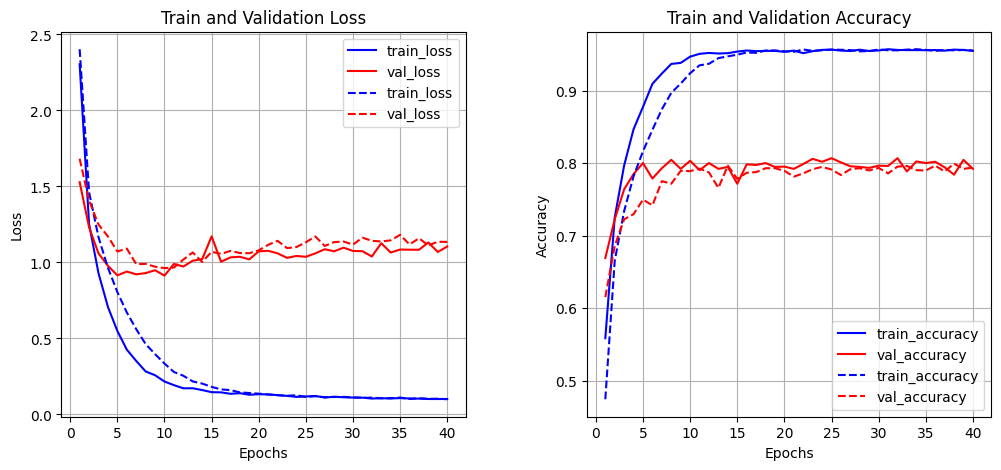

In [19]:
diff_history(history, normal_history)

##### Xavier(Glorot) 초기화

이제 Xavier(Glorot) 초기화 방법 결과 비교를 위해서 모델을 생성하고 학습합니다.

In [20]:
glorot_history = build_model(initializers.GlorotNormal())

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 1s 45ms/step - loss: 2.2374 - accuracy: 0.5480 - val_loss: 1.5555 - val_accuracy: 0.6518
Epoch 2/40
18/18 [==============================] - 1s 34ms/step - loss: 1.2489 - accuracy: 0.7185 - val_loss: 1.2445 - val_accuracy: 0.7164
Epoch 3/40
18/18 [==============================] - 0s 27ms/step - loss: 0.9434 - accuracy: 0.7928 - val_loss: 1.0708 - val_accuracy: 0.7556
Epoch 4/40
18/18 [==============================] - 1s 33ms/step - loss: 0.7211 - accuracy: 0.8431 - val_loss: 1.1162 - val_accuracy: 0.7150
Epoch 5/40
18/18 [==============================] - 1s 32ms/step - loss: 0.5742 - accuracy: 0.8749 - val_loss: 0.9988 - val_accuracy: 0.7591
Epoch 6/40
18/18 [==============================] - 1s 33ms/step - loss: 0.4598 - accuracy: 0.8987 - val_loss: 0.8865 - val_accuracy: 0.7952
Epoch 7/40
18/18 [==============================] - 1s 30ms/step - loss: 0.3624 - accuracy: 0.9204 - val_loss: 0.9045 - val_accuracy: 0.7930
Epoch 8/40
18

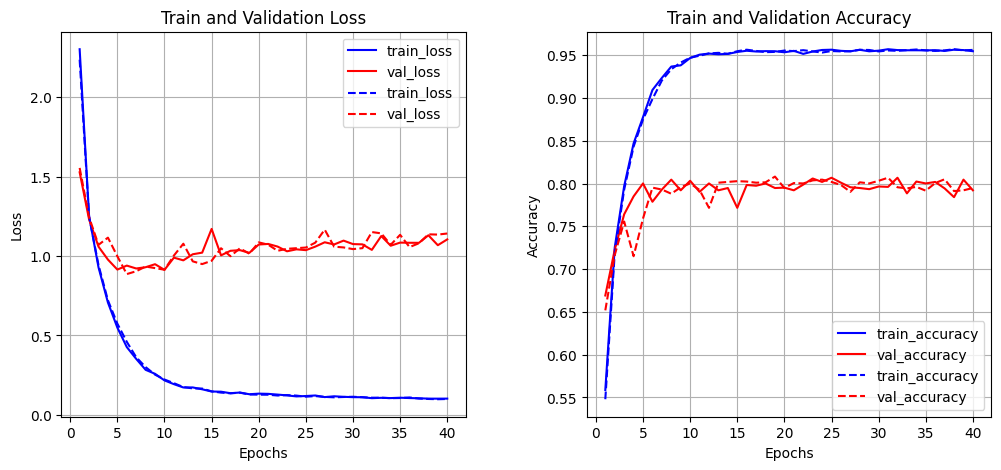

In [21]:
diff_history(history, glorot_history)

Xavier 초기화 방법은 기존 모델에서 사용하는 균일분포와 매우 유사한 형태로 학습된 것을 알 수 있습니다.

#### He 초기화

He 초기화 방법도 비교를 위해서 모델을 생성하고 학습합니다.

In [22]:
he_history = build_model(initializers.HeNormal())

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 1s 35ms/step - loss: 2.1415 - accuracy: 0.5786 - val_loss: 1.3964 - val_accuracy: 0.6995
Epoch 2/40
18/18 [==============================] - 0s 23ms/step - loss: 1.0889 - accuracy: 0.7675 - val_loss: 1.1287 - val_accuracy: 0.7511
Epoch 3/40
18/18 [==============================] - 0s 23ms/step - loss: 0.7629 - accuracy: 0.8342 - val_loss: 0.9805 - val_accuracy: 0.7832
Epoch 4/40
18/18 [==============================] - 0s 25ms/step - loss: 0.5610 - accuracy: 0.8825 - val_loss: 0.9733 - val_accuracy: 0.7711
Epoch 5/40
18/18 [==============================] - 0s 24ms/step - loss: 0.4261 - accuracy: 0.9092 - val_loss: 0.9330 - val_accuracy: 0.7890
Epoch 6/40
18/18 [==============================] - 0s 25ms/step - loss: 0.3322 - accuracy: 0.9262 - val_loss: 0.9297 - val_accuracy: 0.7903
Epoch 7/40
18/18 [==============================] - 0s 25ms/step - loss: 0.2644 - accuracy: 0.9400 - val_loss: 0.9663 - val_accuracy: 0.7778
Epoch 8/40
18

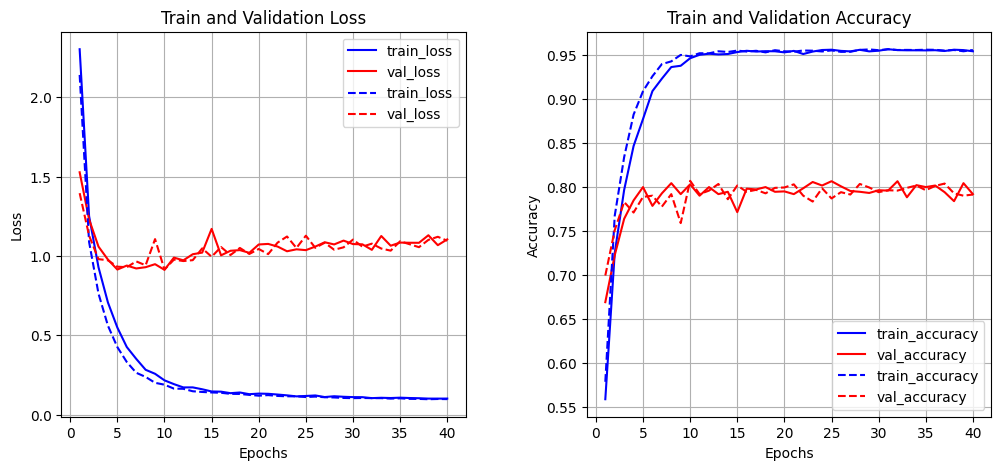

In [23]:
diff_history(history, he_history)

He 초기화는 기존 모델과 비교하여 작지만 좀 더 빠르게 학습된 것을 알 수 있습니다. 현재 모델이 비선형 함수인 relu를 사용하여 He 초기화에 더 적합한 것을 알 수 있습니다.

### 8-4. 배치 정규화(Batch Normalization)

![](./img08/17.png)

배치 정규화는 모델에 입력되는 샘플들을 균일하게 만드는 방법으로 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것을 의미합니다.

보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어주고, 학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줍니다. 또한, 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행합니다.

배치 정규화는 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 레이어에 들어갔다는 보장이 없으므로 주로 Dense 레이어 이후, 활성화 함수 이전에 활용됩니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/on-dlf-8-4-1.max-800x600.png)

https://www.jeremyjordan.me/batch-normalization/

#### 모델 구성 및 컴파일

Reuters 데이터셋에 대해 뉴스 주제를 분류하는 딥러닝 모델에서 기존에 정의했던 3개의 Dense 레이어 사이에 배치 정규화를 위해 BatchNormalization() 레이어를 추가합니다. 다만 일반적으로 Dense 레이어와 Activation 활성함수 레이어 사이에 추가해야 합니다.

In [24]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128)              

In [25]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 39ms/step - loss: 1.8276 - accuracy: 0.6491 - val_loss: 3.3352 - val_accuracy: 0.7378
Epoch 2/40
18/18 [==============================] - 1s 28ms/step - loss: 0.6693 - accuracy: 0.8793 - val_loss: 3.1351 - val_accuracy: 0.7569
Epoch 3/40
18/18 [==============================] - 1s 29ms/step - loss: 0.3670 - accuracy: 0.9320 - val_loss: 2.8077 - val_accuracy: 0.7195
Epoch 4/40
18/18 [==============================] - 0s 27ms/step - loss: 0.2396 - accuracy: 0.9491 - val_loss: 2.4546 - val_accuracy: 0.7177
Epoch 5/40
18/18 [==============================] - 0s 27ms/step - loss: 0.1843 - accuracy: 0.9519 - val_loss: 2.0904 - val_accuracy: 0.6986
Epoch 6/40
18/18 [==============================] - 1s 31ms/step - loss: 0.1586 - accuracy: 0.9517 - val_loss: 1.8102 - val_accuracy: 0.7168
Epoch 7/40
18/18 [==============================] - 1s 33ms/step - loss: 0.1413 - accuracy: 0.9509 - val_loss: 1.6016 - val_accuracy: 0.7186
Epoch 8/40
18

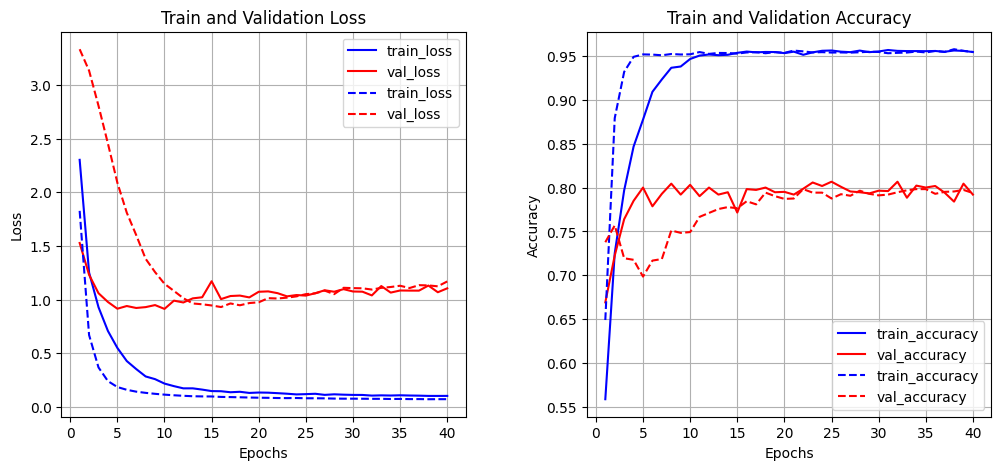

In [26]:
diff_history(history, batch_norm_history)

기본 모델과 배치 정규화를 적용한 모델을 비교해보면, 배치 정규화를 적용한 모델이 좀 더 빠르고 안정되게 학습이 되는 것을 알 수 있습니다.

#### 실습해보기

다만 배치 정규화에 대해선 아직도 밝혀지지 않은 부분이 많아 꾸준히 연구가 진행되고 있습니다. 배치 정규화의 위치 역시 연구중인 분야로 활성화 함수 다음에 적용해야한다는 주장도 있습니다. 아래에서는 활성화 함수 다음에 BatchNormalization() 레이어를 추가하고 성능을 비교해 봅시다.

In [27]:
# [play ground]

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))

# 활성화 함수를 Dense 레이어와 같이 선언할 수도 있지만 단순히 위 코드에서 순서를 바꾸어도 동일하게 동작합니다.
model.add(layers.BatchNormalization())

model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1286574 (4.91 MB)
Trainable params: 1286318 (4.91 MB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


In [28]:
orderd_bn_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 39ms/step - loss: 1.5322 - accuracy: 0.7098 - val_loss: 2.9819 - val_accuracy: 0.7872
Epoch 2/40
18/18 [==============================] - 1s 30ms/step - loss: 0.5045 - accuracy: 0.9153 - val_loss: 2.8295 - val_accuracy: 0.7827
Epoch 3/40
18/18 [==============================] - 1s 30ms/step - loss: 0.3480 - accuracy: 0.9389 - val_loss: 2.4843 - val_accuracy: 0.7992
Epoch 4/40
18/18 [==============================] - 1s 29ms/step - loss: 0.2963 - accuracy: 0.9470 - val_loss: 2.3637 - val_accuracy: 0.7956
Epoch 5/40
18/18 [==============================] - 0s 27ms/step - loss: 0.2610 - accuracy: 0.9483 - val_loss: 2.0801 - val_accuracy: 0.7974
Epoch 6/40
18/18 [==============================] - 1s 29ms/step - loss: 0.2375 - accuracy: 0.9513 - val_loss: 1.8594 - val_accuracy: 0.7965
Epoch 7/40
18/18 [==============================] - 0s 28ms/step - loss: 0.2207 - accuracy: 0.9528 - val_loss: 1.6252 - val_accuracy: 0.7956
Epoch 8/40
18

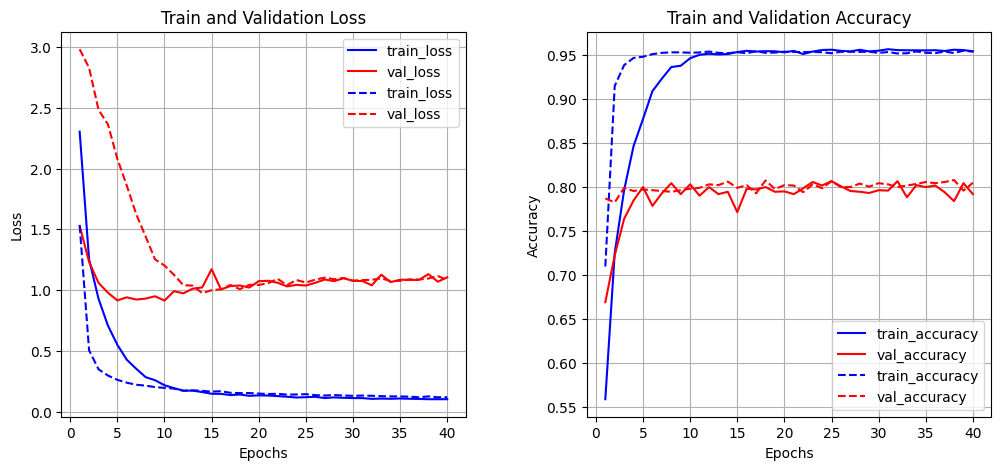

In [29]:
diff_history(history, orderd_bn_history)

### 이번 시간 정리

딥러닝 모델 학습을 효과적으로 하기 위한 다양한 방법들에 대해서 살펴보았습니다.

딥러닝 모델의 가중치 초기화 방법과 방법별 차이를 이해했습니다.

딥러닝 모델의 빠르고 안정된 학습을 위한 배치 정규화를 적용하는 방법을 이해했습니다.

### 종합 문제


Q. 가중치 초기화는 무엇을 하는 것이고 왜 해야하나요?

모델이 학습하기 전 가중치 값을 부여하는 것으로 적절한 가중치 값이 주어지지 않을 경우 가중치 중 활성화되는 부분이 매우 적거나 편향될 수 있기 때문에 필요합니다.

가중치 초기화(Weight initialization)는 딥러닝과 같은 머신러닝 모델에서 사용되는 신경망의 파라미터를 처음에 설정하는 과정입니다. 가중치 초기화의 목적은 경사 하강법(Gradient Descent)과 같은 최적화 알고리즘을 이용하여 모델 학습을 수행할 때 수렴 속도를 높이고, 전역 최적점(Global Optimum)에 가까운 최적의 솔루션을 찾기 위함입니다.

가중치 초기화를 왜 해야하는지에 대한 몇 가지 이유는 다음과 같습니다:

1. 학습 속도 향상: 알맞게 초기화된 가중치는 학습 과정에서 수렴 속도를 빠르게 하여 더 빠른 시간 내에 최적의 솔루션을 찾을 수 있게 합니다.

2. 낮은 손실값 시작: 올바른 가중치 초기화는 학습이 시작될 때 손실 함수(Loss function)의 값을 낮출 수 있습니다. 그 결과로, 신경망은 더 빨리 최적의 성능을 발휘할 수 있습니다.

3. 기울기 소실 및 폭주 문제 방지: 기울기 소실(Vanishing gradient) 또는 기울기 폭주(Exploding gradient)와 같은 문제는 신경망 학습 시 발생할 수 있는 큰 문제입니다. 학습을 어렵게 만들거나 발산시키기 때문입니다. 적절한 가중치 초기화 방법을 사용하면 이러한 문제의 발생 가능성을 줄일 수 있습니다.

가중치 초기화의 일반적인 방법에는 Zero Initialization, Random Initialization, Xavier (Glorot) Initialization, He Initialization 등이 있습니다. 신경망의 구조, 활성화 함수 및 목표에 따라 적절한 초기화 방안을 선택해야 합니다.

Q. 배치 정규화는 무엇을 하는 것이고 왜 해야하나요?

들어온 데이터를 배치 단위로 평균이 0, 표준편차가 1인 데이터로 조정해주는 일이며 학습 속도 증가와 과대적합을 방지할 수 있습니다.

배치 정규화(Batch Normalization)는 딥러닝 모델, 특히 깊은 신경망에서 사용되는 방법입니다. 배치 정규화는 학습 과정 동안 각 층의 입력 분포를 정규화함으로써 전체 네트워크의 학습 속도를 높이고, 성능을 개선하는 것을 목표로 합니다.

배치 정규화를 왜 해야 하는지에 대한 몇 가지 이유는 다음과 같습니다:

1. 공변량 변화(covariate shift) 억제: 신경망 학습 과정에서 각 층의 입력 분포가 변할 수 있습니다. 이러한 변화로 인해 다음 층에도 영향을 미쳐 네트워크 전체의 학습이 불안정해집니다. 배치 정규화는 이러한 공변량 변화를 줄이기 위해 각 층의 입력 분포를 평균 0, 분산 1로 정규화하고 작은 노이즈를 추가합니다.

2. 학습 속도 향상: 배치 정규화를 사용하면 경사 하강법 등의 최적화 알고리즘의 학습률(learning rate)을 크게 설정할 수 있어 학습 속도가 개선됩니다.

3. 가중치 초기화 영향 감소: 배치 정규화는 가중치 초기화의 영향을 줄여 모델의 안정성을 높입니다. 적절한 가중치 초기화는 여전히 중요하지만, 배치 정규화를 사용하면 초기화가 덜 완벽해도 네트워크가 수렴하는 데 도움을 줍니다.

4. 기울기 소실 및 폭주 문제 완화: 배치 정규화는 기울기 소실 및 기울기 폭주 문제를 완화하는 효과를 줍니다. 이는 각 층의 활성화 값 분포가 상대적으로 안정적이기 때문에 역전파 과정에서 소실되거나 폭주하는 기울기를 완화할 수 있습니다.

5. 과적합 억제: 배치 정규화는 모델의 일반화 성능을 개선하는데 도움이 됩니다. 정규화에 사용되는 작은 노이즈는 훈련 데이터에 대한 모델의 종속성을 감소시켜 과적합을 억제하는 효과를 줍니다.

배치 정규화는 신경망 모델의 성능과 안정성을 향상시키는 데 큰 도움이 되므로 깊은 신경망에서 널리 사용됩니다.